In [43]:
import pandas as pd
import sqlite3
import contextlib 
%matplotlib notebook
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import g3read as g
import pp
u = pp.pint()

#DB="/tmp/ciao_1e4_22_06_2018.sql"
DB="/tmp/antonio/magneticum.sql.bk.4"



In [44]:
def simul(q):
    with contextlib.closing(sqlite3.connect(DB)) as con:
        with con as cur:
           return pd.read_sql_query(q, cur)

In [45]:
simul ("select * from simulation")

,id,name,box_size,h
0,1,/HydroSims/Magneticum/Box0/mr_bao/,2688000.0,0.704
1,2,/HydroSims/Magneticum/Box2b/hr_bao/,640000.0,0.704
2,3,/HydroSims/Magneticum/Box4/uhr_test/,48000.0,0.704


In [46]:
simul ("select * from snap where snap.simulation_id=3")

,id,name,redshift,a,simulation_id,tag
0,11,136,0.066340,0.937787,3,z0
1,12,096,0.470194,0.680182,3,z05
2,13,058,0.994709,0.501326,3,z1
3,14,044,1.477581,0.403619,3,z15
4,15,036,1.980082,0.335561,3,z2


In [47]:
df = simul ("select * from fof where fof.snap_id=11")

In [48]:
rdf = df.sample(n=1000)

In [49]:
' '.join(np.sort(rdf.keys()))

'bgma bgpo0 bgpo1 bgpo2 bgra c200c end_subfind_file fossilness fossilness_mcent fossilness_msat fsub glen goff gpos0 gpos1 gpos2 i_file i_in_file id id_cluster lgas0 lgas1 lgas2 lgas3 lgas4 lgas5 m200 m25k m500 m5cc mcon mcri mgas0 mgas1 mgas2 mgas3 mgas4 mgas5 mgas6 mstr0 mstr1 mstr2 mstr3 mstr4 mstr5 mtot mvir ncon nsub r200 r25k r500 r5cc rcon rcri rtot rvir snap_id start_subfind_file tgas0 tgas1 tgas2 tgas3 tgas4 tgas5 virialness_beta virialness_es virialness_es_gas virialness_eta virialness_k virialness_k_gas virialness_w virialness_w_gas ygas0 ygas1 ygas2 ygas3 ygas4 ygas5'

<IPython.core.display.Javascript object>


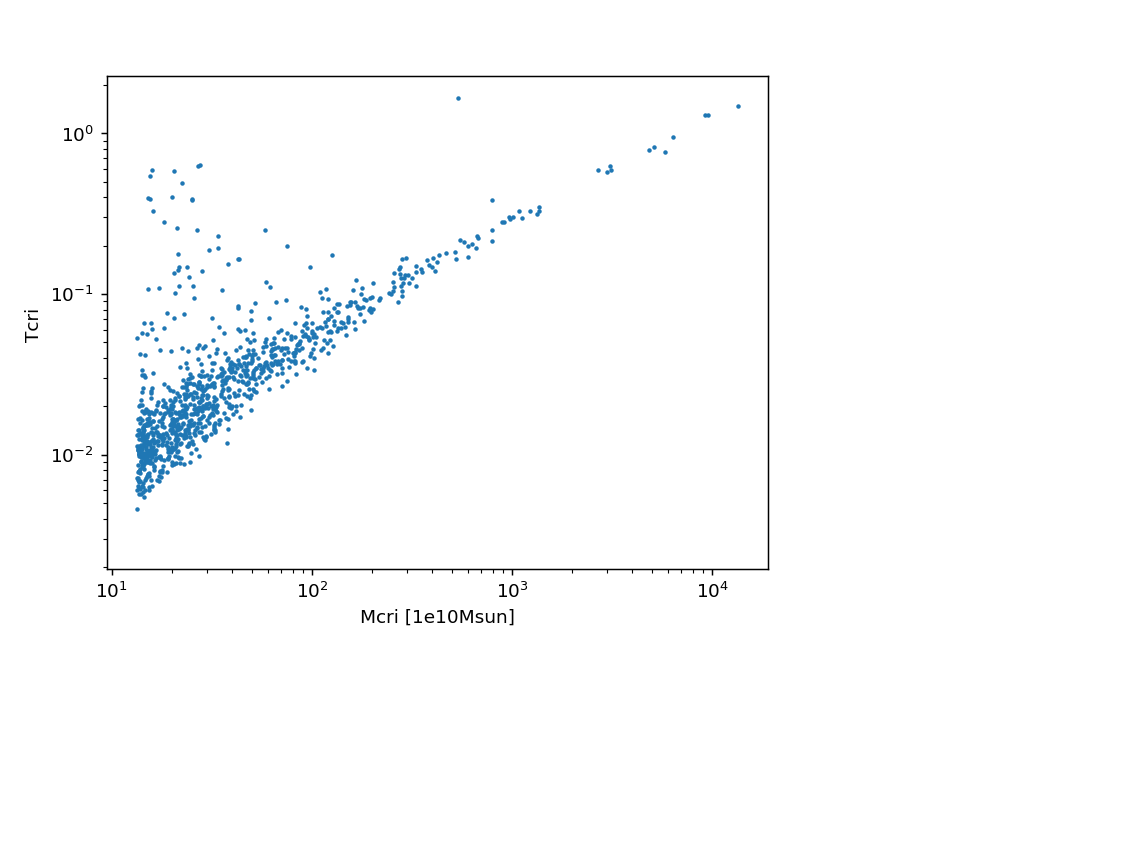

In [50]:
u.define('hubble = 0.704')

f,a = plt.subplots(1,1)
#a.scatter( (u.cmass*rdf.mcri).to(u.Msun),rdf.fossilness,s=1)

a.scatter( rdf.mcri,rdf.tgas0,s=2) #c=rdf.redshift, s=2)

a.set_xscale('log')
a.set_yscale('log')
a.set_xlabel("Mcri [1e10Msun]")

a.set_ylabel("Tcri ")

f.show()

In [16]:
simul ("select * from snap where snap.simulation_id=1")

,id,name,redshift,a,simulation_id,tag
0,1,037,2.220446e-16,1.000000,1,z0
1,2,025,4.701941e-01,0.680182,1,z05
2,3,014,1.178895e+00,0.458948,1,z1
3,4,012,1.477581e+00,0.403619,1,z15
4,5,010,1.980082e+00,0.335561,1,z2


In [51]:
df = simul ("""
select fof.id_cluster from fof 
inner join galaxy on galaxy.id_cluster = fof.id_cluster
where  galaxy.snap_id = 1 and fof.snap_id = 1
and fof.mcri>1e15/1e10
and galaxy.msub>fof.mcri*0.1

""")


In [53]:
ids, counts = np.unique(df.id_cluster,return_counts =True)
ids[counts>=3]

array([  1,   9,  43,  44, 168, 360])